In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
data = {
    "Area":[800,900,1000,1100,1200,1300,1400,1500,1600,1700],
    "Bedrooms":[1,2,2,2,3,3,3,4,4,4],
    "Bathrooms":[1,1,2,2,2,2,3,3,3,3],
    "Age":[15,12,10,8,6,5,4,3,2,1],
    "Distance_City":[15,14,13,12,10,9,8,7,6,5],
    "Price":[40,50,55,60,70,75,80,90,95,100]
}
df = pd.DataFrame(data)

In [3]:
df

,Area,Bedrooms,Bathrooms,Age,Distance_City,Price
0,800,1,1,15,15,40
1,900,2,1,12,14,50
2,1000,2,2,10,13,55
3,1100,2,2,8,12,60
4,1200,3,2,6,10,70
5,1300,3,2,5,9,75
6,1400,3,3,4,8,80
7,1500,4,3,3,7,90
8,1600,4,3,2,6,95
9,1700,4,3,1,5,100


In [4]:
X = df.drop("Price",axis=1) # multiple columns
y = df["Price"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Ridge Regularization.

In [20]:
ridge = Ridge(alpha=2.0)
ridge.fit(X_train_scaled, y_train)

,alpha,2.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [21]:
y_train_pred_lin = linear.predict(X_train_scaled)
y_test_pred_lin = linear.predict(X_test_scaled)

In [22]:
train_mse_lin = mean_squared_error(y_train, y_train_pred_lin)
test_mse_lin = mean_squared_error(y_test, y_test_pred_lin)

print("Train MSE:", train_mse_lin)
print("Test MSE:", test_mse_lin)

Train MSE: 7.573064690121713e-29
Test MSE: 2.0194839173657902e-28


In [23]:
y_train_pred_rid = linear.predict(X_train_scaled)
y_test_pred_rid = linear.predict(X_test_scaled)

In [24]:
train_mse_rid = mean_squared_error(y_train, y_train_pred_rid)
test_mse_rid = mean_squared_error(y_test, y_test_pred_rid)

print("Train MSE:", train_mse_rid)
print("Test MSE:", test_mse_rid)

Train MSE: 7.573064690121713e-29
Test MSE: 2.0194839173657902e-28


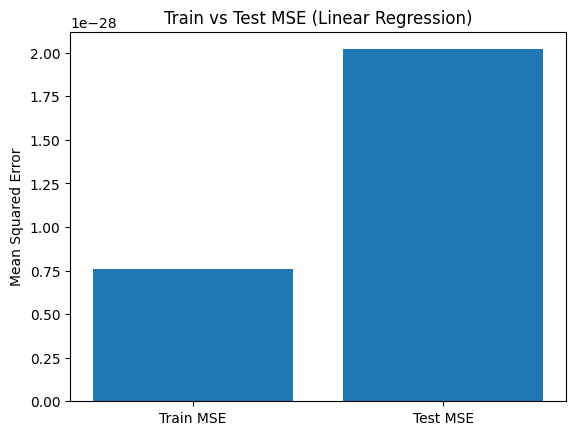

In [25]:
plt.bar(["Train MSE", "Test MSE"], [train_mse_lin, test_mse_lin])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE (Linear Regression)")
plt.show()

# Lasso Regularization.

In [26]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train_scaled, y_train)

,alpha,0.5
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [27]:
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

In [28]:
Train_MSE_Lasso = mean_squared_error(y_train, y_train_pred)
Test_MSE_Lasso = mean_squared_error(y_test, y_test_pred)

print("Train MSE:", Train_MSE_Lasso)
print("Test MSE:", Test_MSE_Lasso)

Train MSE: 0.2540521315349333
Test MSE: 0.3559021173890168


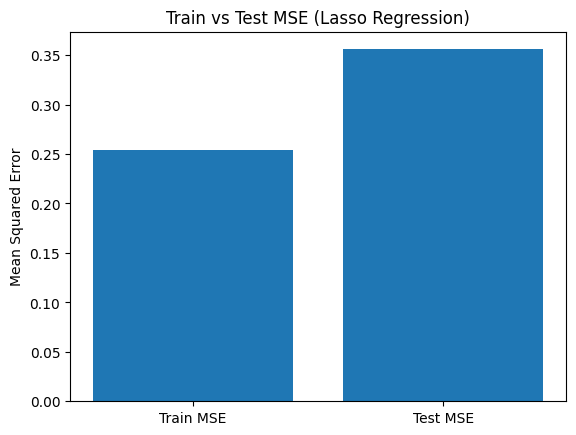

In [29]:
plt.bar(["Train MSE", "Test MSE"], [Train_MSE_Lasso, Test_MSE_Lasso])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE (Lasso Regression)")
plt.show()

In [30]:
lasso_coefficients = pd.Series(lasso.coef_,index=X.columns)

print(lasso_coefficients)

Area             13.200626
Bedrooms          4.581169
Bathrooms         0.000000
Age              -0.000000
Distance_City    -0.013020
dtype: float64


In [31]:
X_plot = pd.DataFrame({
    "Area" : np.linspace(df["Area"].min(), df["Area"].max(), 100),
    "Bedrooms": df["Bedrooms"].mean(),
    "Bathrooms": df["Bathrooms"].mean(),
    "Age": df["Age"].mean(),
    "Distance_City": df["Distance_City"].mean()
})    

In [33]:
X_plot

,Area,Bedrooms,Bathrooms,Age,Distance_City
0,800.000000,2.8,2.2,6.6,9.9
1,809.090909,2.8,2.2,6.6,9.9
2,818.181818,2.8,2.2,6.6,9.9
3,827.272727,2.8,2.2,6.6,9.9
4,836.363636,2.8,2.2,6.6,9.9
...,...,...,...,...,...
95,1663.636364,2.8,2.2,6.6,9.9
96,1672.727273,2.8,2.2,6.6,9.9
97,1681.818182,2.8,2.2,6.6,9.9
98,1690.909091,2.8,2.2,6.6,9.9


<function matplotlib.pyplot.show(close=None, block=None)>

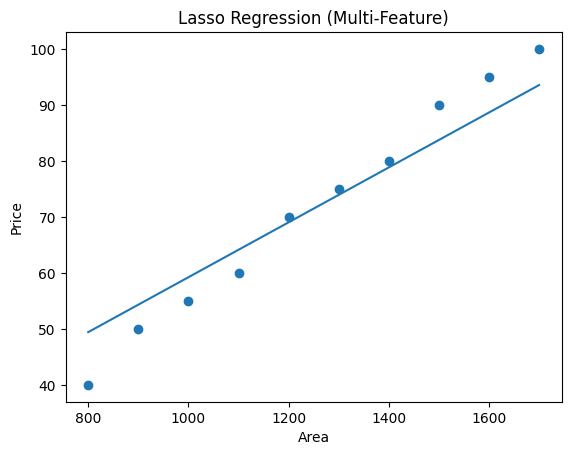

In [34]:
X_plot_scaled = scaler.transform(X_plot)
y_line = lasso.predict(X_plot_scaled)

plt.scatter(df["Area"], df["Price"], label="Actual Data")
plt.plot(X_plot["Area"], y_line, label="Lasso Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Lasso Regression (Multi-Feature)")
plt.show            